# Learn Probability Density Functions
## Upload your CSV file below

In [5]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


## Import Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import erf
from scipy.stats import kstest
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [8]:
filename = list(uploaded.keys())[0]

encodings = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252', 'windows-1252']

for encoding in encodings:
    try:
        df = pd.read_csv(filename, encoding=encoding)
        print(f"✓ Dataset loaded successfully with {encoding} encoding!")
        break
    except:
        continue

print(f"Shape: {df.shape}")
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
df.head()

✓ Dataset loaded successfully with latin-1 encoding!
Shape: (435742, 13)

Columns: ['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type', 'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5', 'date']

First few rows:


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


## Roll Number Parameters
** Roll Number:** 102317143

In [9]:
r = 102317143

ar = 0.05 * (r % 7)
br = 0.3 * (r % 5 + 1)

print("="*60)
print(f"Roll Number: {r}")
print(f"ar = {ar}")
print(f"br = {br}")
print("="*60)

Roll Number: 102317143
ar = 0.25
br = 1.2


## Check Available Columns

In [11]:
print("Available columns in your dataset:")
print(df.columns.tolist())
print("\nDataset info:")
print(df.info())

Available columns in your dataset:
['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type', 'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5', 'date']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non

## STEP 1: Transform Data
**z = x + ar × sin(br × x)**

In [12]:
x = df['no2'].dropna().values

print(f"Original data points: {len(x)}")
print(f"NO2 range: [{x.min():.2f}, {x.max():.2f}]")

z = x + ar * np.sin(br * x)

print(f"\nTransformed data range: [{z.min():.2f}, {z.max():.2f}]")

Original data points: 419509
NO2 range: [0.00, 876.00]

Transformed data range: [0.00, 876.24]


## Visualize Transformation

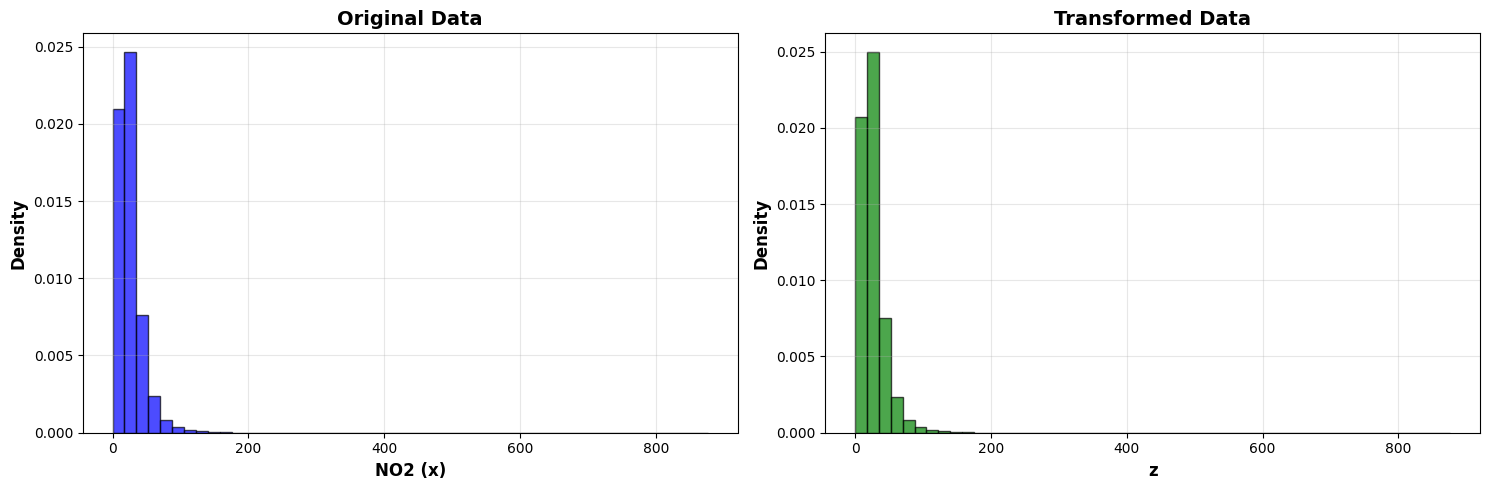

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(x, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_xlabel('NO2 (x)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Density', fontsize=12, fontweight='bold')
axes[0].set_title('Original Data', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].hist(z, bins=50, density=True, alpha=0.7, color='green', edgecolor='black')
axes[1].set_xlabel('z', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Density', fontsize=12, fontweight='bold')
axes[1].set_title('Transformed Data', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## STEP 2: Learn Parameters
**PDF: p̂(z) = c × exp(-λ(z-μ)²)**

In [14]:
mu = np.mean(z)
variance = np.var(z)
lambda_param = 1 / (2 * variance)
c = np.sqrt(lambda_param / np.pi)

print("="*70)
print("LEARNED PARAMETERS")
print("="*70)
print(f"μ (mu)     = {mu:.10f}")
print(f"λ (lambda) = {lambda_param:.10f}")
print(f"c          = {c:.10f}")
print("="*70)

LEARNED PARAMETERS
μ (mu)     = 25.8041489341
λ (lambda) = 0.0014596395
c          = 0.0215549921


## Visualize Fitted PDF

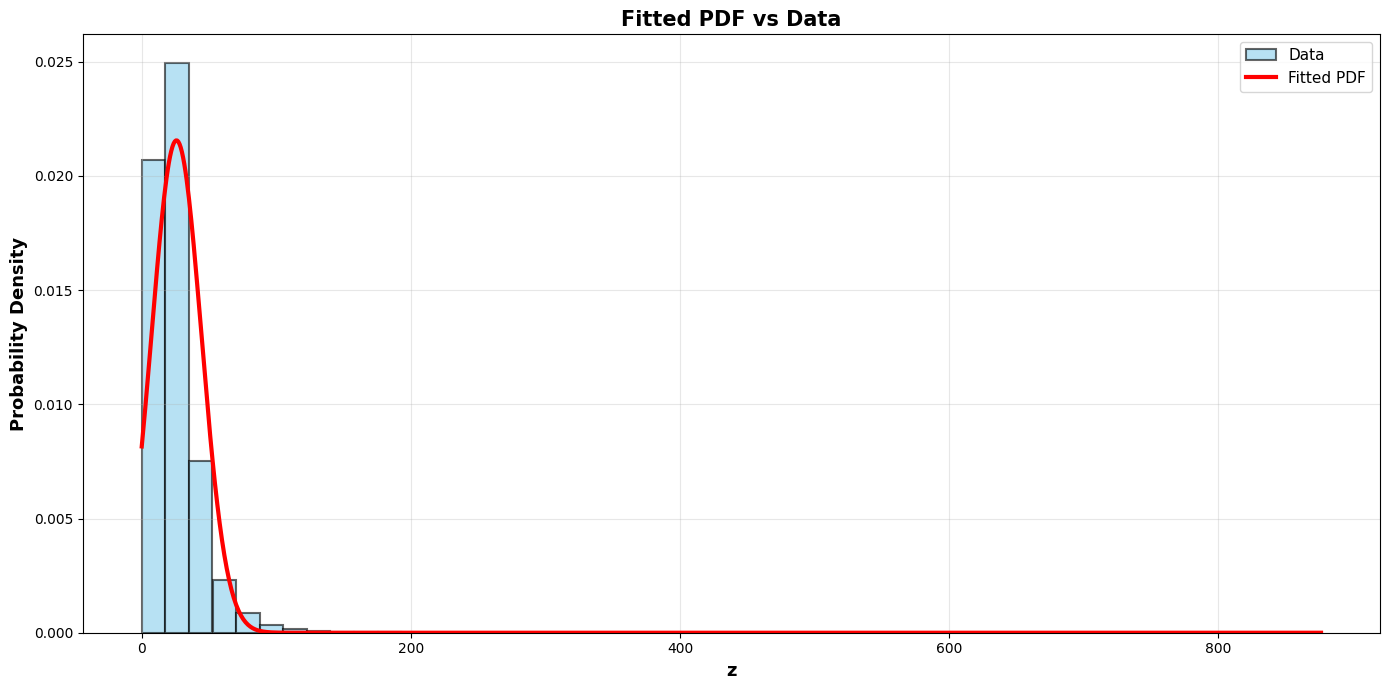

In [15]:
plt.figure(figsize=(14, 7))

plt.hist(z, bins=50, density=True, alpha=0.6, color='skyblue',
         edgecolor='black', label='Data', linewidth=1.5)

z_range = np.linspace(z.min(), z.max(), 1000)
pdf_fitted = c * np.exp(-lambda_param * (z_range - mu)**2)

plt.plot(z_range, pdf_fitted, 'r-', linewidth=3, label='Fitted PDF')

plt.xlabel('z', fontsize=13, fontweight='bold')
plt.ylabel('Probability Density', fontsize=13, fontweight='bold')
plt.title('Fitted PDF vs Data', fontsize=15, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [16]:
## Model Validation

In [17]:
def cdf_fitted(z_val):
    return 0.5 * (1 + erf(np.sqrt(lambda_param) * (z_val - mu)))

ks_statistic, p_value = kstest(z, cdf_fitted)

print("="*70)
print("GOODNESS OF FIT TEST")
print("="*70)
print(f"KS Statistic: {ks_statistic:.6f}")
print(f"P-value: {p_value:.6f}")
print(f"Result: {'Good Fit ✓' if p_value > 0.05 else 'Poor Fit ✗'}")
print("="*70)

GOODNESS OF FIT TEST
KS Statistic: 0.123841
P-value: 0.000000
Result: Poor Fit ✗


In [18]:
# 🎯 STEP 3: FINAL RESULTS

In [19]:
print("\n" + "🎯"*40)
print(" "*30 + "FINAL SUBMISSION RESULTS")
print("🎯"*40)
print(f"\nRoll Number: {r}")
print(f"ar = {ar}")
print(f"br = {br}")
print("\n" + "="*80)
print(f"{'PARAMETER':<20} {'VALUE':<30}")
print("="*80)
print(f"{'μ (mu)':<20} {mu:<30.10f}")
print(f"{'λ (lambda)':<20} {lambda_param:<30.10f}")
print(f"{'c':<20} {c:<30.10f}")
print("="*80)
print(f"\nSample Size: {len(z)} observations")
print("🎯"*40)


🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
                              FINAL SUBMISSION RESULTS
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯

Roll Number: 102317143
ar = 0.25
br = 1.2

PARAMETER            VALUE                         
μ (mu)               25.8041489341                 
λ (lambda)           0.0014596395                  
c                    0.0215549921                  

Sample Size: 419509 observations
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯


In [20]:
## 📤 COPY THESE VALUES FOR SUBMISSION

In [23]:
print("\n" + "┏" + "━"*78 + "┓")
print("┃" + " "*25 + "SUBMISSION VALUES" + " "*36 + "┃")
print("┣" + "━"*78 + "┫")
print(f"┃  μ (mu)     = {mu:<60.10f}   ┃")
print(f"┃  λ (lambda) = {lambda_param:<60.10f}   ┃")
print(f"┃  c          = {c:<60.10f}   ┃")
print("┗" + "━"*78 + "┛")


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                         SUBMISSION VALUES                                    ┃
┣━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┫
┃  μ (mu)     = 25.8041489341                                                  ┃
┃  λ (lambda) = 0.0014596395                                                   ┃
┃  c          = 0.0215549921                                                   ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
